# Satistics for the found jet clusters
 In this jupyter notebook you can look at the properties of the extracted jet clusters. The properties can be read in through the csv file found in export, made in BoxTheJets/Find_export_jet_clusters.ipynb. The test set uses eps=3.0, time_eps=2.0 but this can be varied if wanted to make different sets of Jet clusters. 

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import os
plt.style.use('default')
%matplotlib inline

In [38]:
#Loading in the properties
file_path='BoxTheJets/exports/Jet_clusters_3.0_2.0_test.csv'
Cluster_date=np.loadtxt(file_path,delimiter=',',unpack=True,usecols=0,dtype='datetime64')
Cluster_SOL=np.loadtxt(file_path,delimiter=',',unpack=True,usecols=1,dtype=str)
stat_dur,stat_Bx,std_Bx,stat_By,std_By,stat_Lon,stat_Lat,stat_H,upper_H,lower_H,stat_W,std_W,stat_vel,stat_sigma=np.loadtxt(file_path,delimiter=',',unpack=True,usecols=(2,3,4,5,6,7,8,9,10,11,12,13,14,15),dtype=float)


## Flagging
We introduce three binary flags to indicate a higher uncertainty of our jet clusters. 
flag 100 means the jet cluster has a duration of less than 6 minutes, which for many corresponds to a jet cluster found in one Zooniverse subject. 
flag 010 means the velocity estimate could not be calculated because the maximum was reached in the first subject the jet was found in. 
flag 001 means the basepoint has a Longitude of higher than 90 degrees meaning the base point was found to be (slightly) off limb. 


In [39]:
#Flagging
flag1=np.where(stat_dur<6)[0]
flag2=np.where(np.isnan(stat_vel))[0]
flag3=np.where(np.abs(stat_Lon)>90)[0]
tel=0
flags=np.array([])

for i in range(len(Cluster_date)):
    f1,f2,f3= i in flag1, i in flag2, i in flag3
    if f1 or f2 or f3:
        flag=str(int(f1 == True))+str(int(f2 == True))+str(int(f3 == True))
    else:
        flag='000'
        tel+=1
    flags=np.append(flags,flag)

print ('Amount Jet clusters with flags', tel)

Amount Jet clusters with flags 234


## Filtering
In our analysis we look at the sigma measure, which has values between 0 and 1, of the box to determine which jets are of higher confidence. We see how many jets remain after taking various maximal values. We chose a cut of 0.8 for our final exported version

In [40]:
print('Jet cluster after no filtering',len(Cluster_date))
index_8=np.where(stat_sigma<0.8)[0]
print('Jet cluster after 0.8 filtering', len(index_8))
index_6=np.where(stat_sigma<0.6)[0]
print('Jet cluster after 0.6 filtering',len(index_6))
index_4=np.where(stat_sigma<0.4)[0]
print('Jet cluster after 0.4 filtering',len(index_6))

Jet cluster after no filtering 658
Jet cluster after 0.8 filtering 658
Jet cluster after 0.6 filtering 651
Jet cluster after 0.4 filtering 651


In [41]:
data= np.loadtxt(file_path,delimiter=',',dtype=str,skiprows=0,comments='%')
flags_arr=np.insert(flags,0,' flags')
data2=np.column_stack((data, np.array(flags_arr)))
csv_final='BoxTheJets/exports/Jet_clusters_3.0_2.0_test_final.csv'
np.savetxt(csv_final,data2, delimiter=",",newline='\n',fmt='%s')

In [42]:
#export final version in Json
from BoxTheJets.aggregation import json_import_list, json_export_list
Jet_clusters=json_import_list('BoxTheJets/exports/Jet_clusters_3.0_2.0_paper.json')
for i,C in enumerate(Jet_clusters):
    C.flag=flags[i]
final_clusters=Jet_clusters[index_8]
json_export_list(final_clusters,'BoxTheJets/exports/Jet_clusters_3.0_2.0_final')

The 658 JetCluster objects are imported from BoxTheJets/exports/Jet_clusters_3.0_2.0_paper.json.
The 658 JetCluster objects are exported to BoxTheJets/exports/Jet_clusters_3.0_2.0_final.json.


## Plotting histograms of the properties
The following plots are saved in the statitstics folder. 

In [43]:
def make_statistics_folder():
    path = 'SOL/statistics/'
    #check if folder for plots exists
    isExist = os.path.exists(path)
    if not isExist: 
      os.makedirs(path)
      print("statistics directory is created")
        
        
make_statistics_folder()

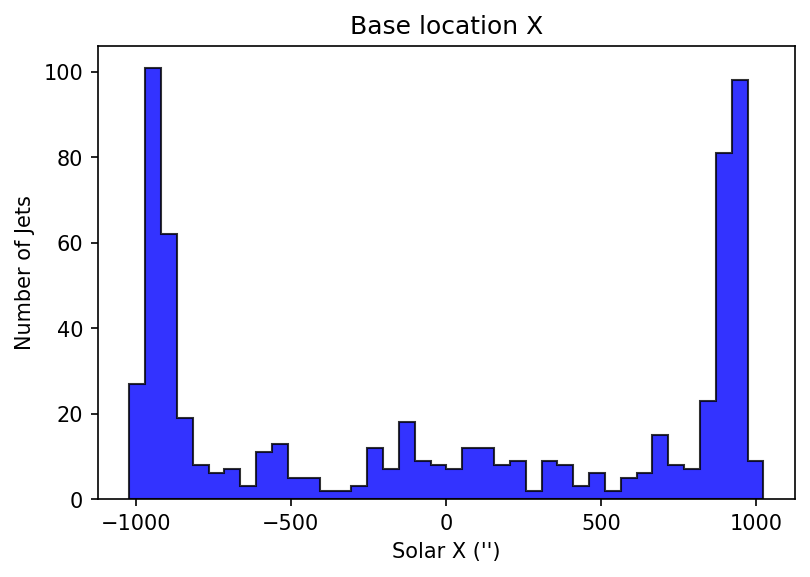

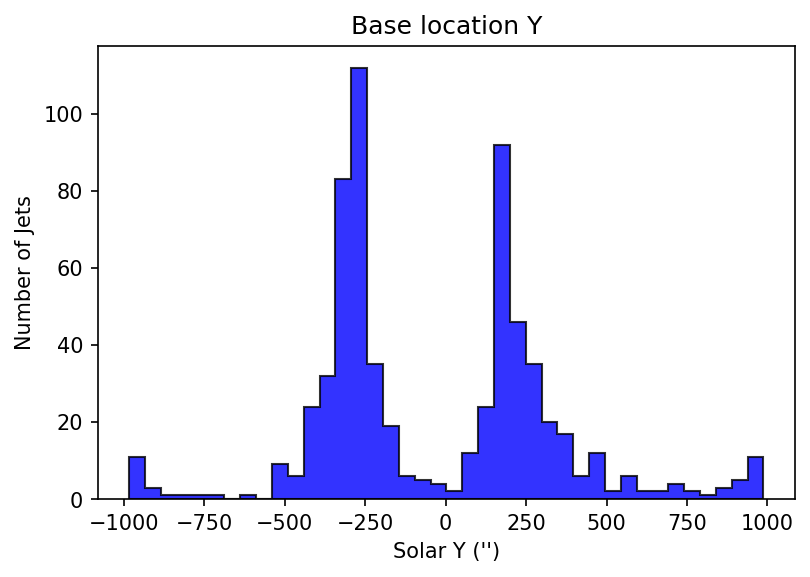

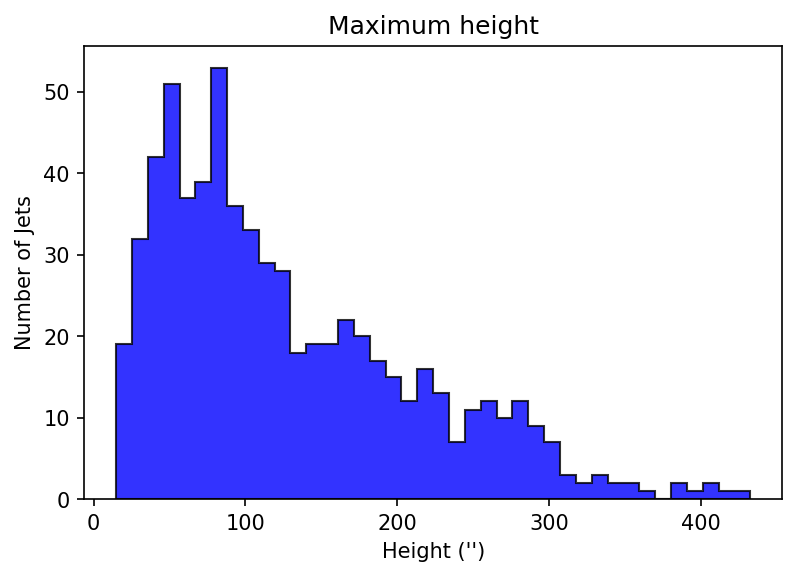

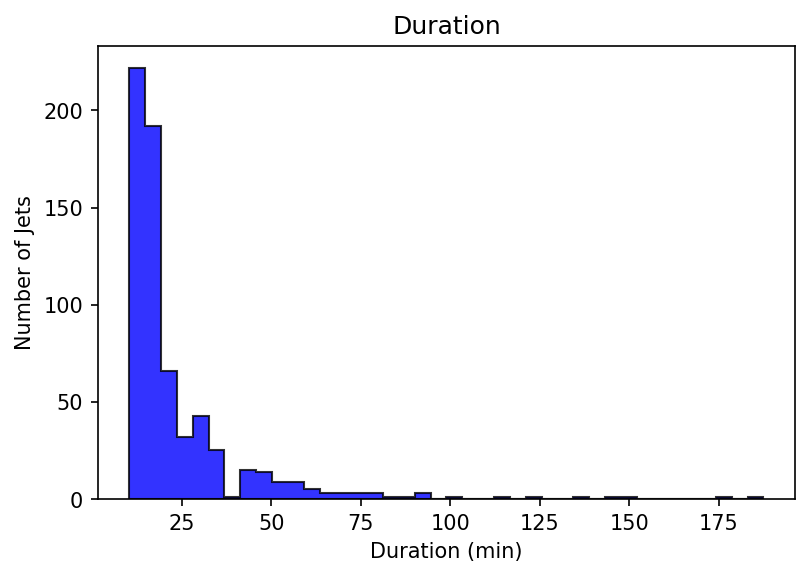

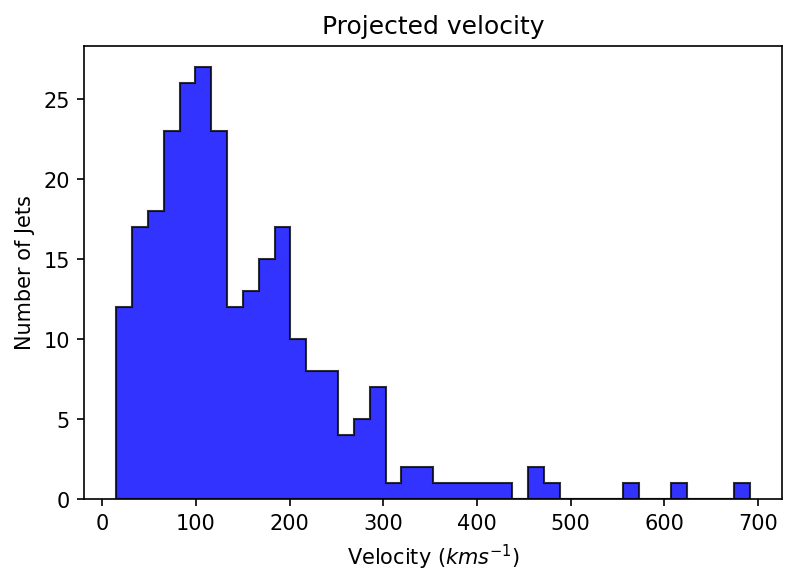

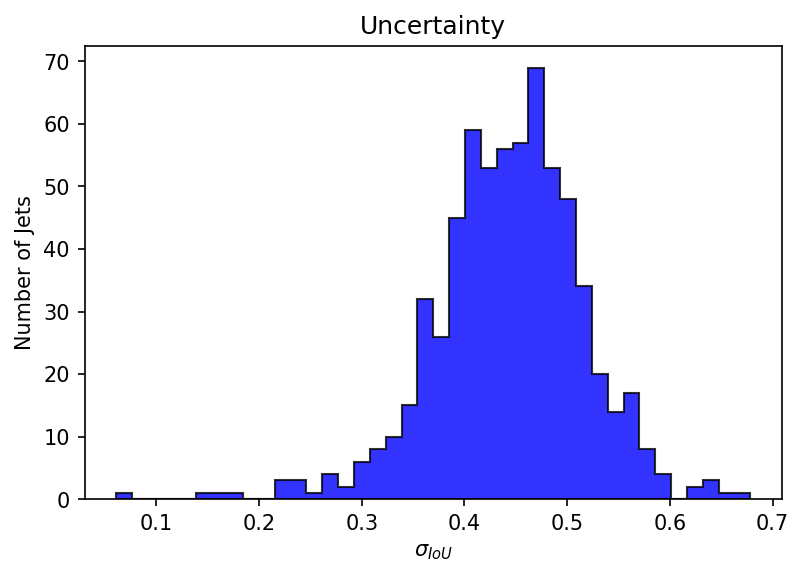

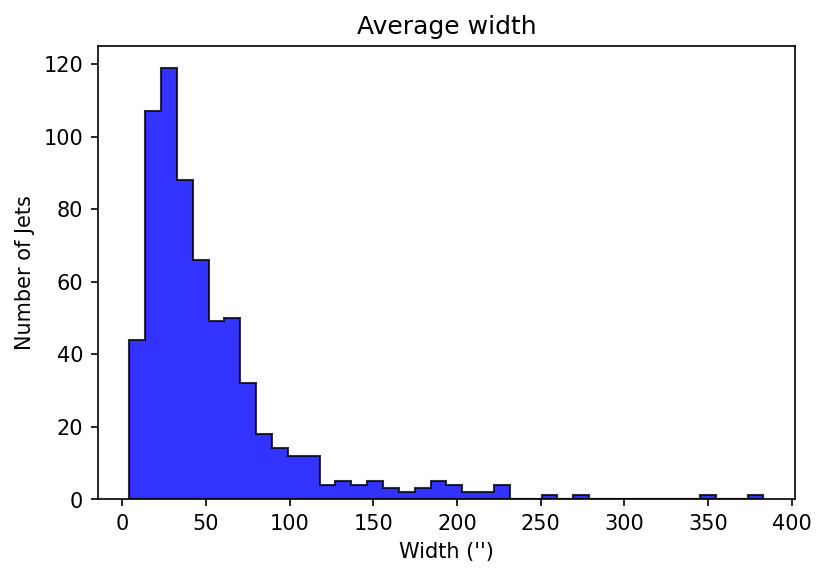

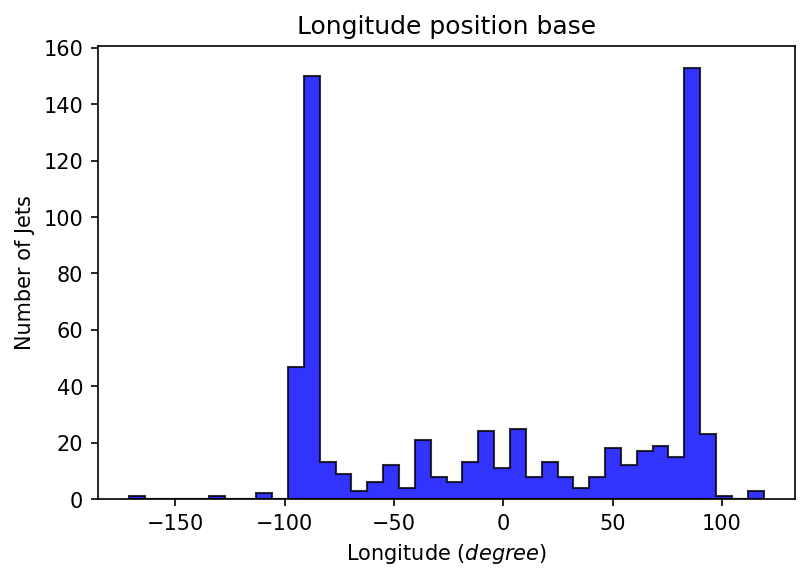

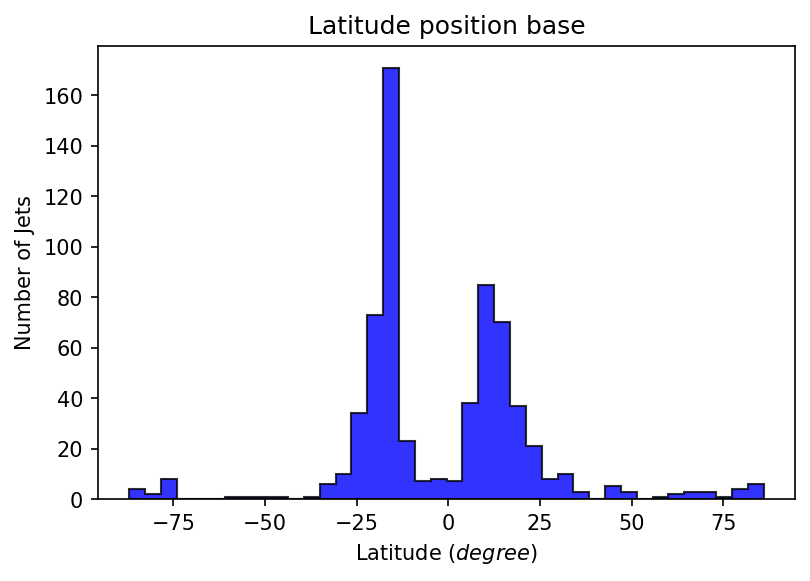

In [44]:
histo=[stat_Bx,stat_By,stat_H,stat_dur+5,stat_vel*725,stat_sigma, stat_W, stat_Lon,stat_Lat]
title=['Base location X','Base location Y','Maximum height','Duration','Projected velocity','Uncertainty','Average width','Longitude position base' ,'Latitude position base']
xlabel=['Solar X (\'\')', 'Solar Y (\'\')', 'Height (\'\')', 'Duration (min)', 'Velocity ($km s^{-1}$)','$\sigma_{IoU}$', 'Width (\'\')', 'Longitude ($degree$)','Latitude ($degree$)']
#stat_Bxstd,stat_Bystd,stat_Hstd
for l in range(len(histo)):
    plt.figure(dpi=150, facecolor='white')
    plt.ylabel('Number of Jets')
    plt.title(title[l])
    plt.hist(histo[l][index_8],histtype='stepfilled',color='blue', alpha=0.8, bins=40, ec="k")#bins=30,color='red',alpha=0.8)
    plt.xlabel(xlabel[l])
    plt.savefig(f'SOL/statistics/stats_{title[l]}_0.8.pdf',dpi=300)
    plt.show()

In [70]:
print('Average & Standard Deviation & Median & Minimum & Maximum')
print(np.average(stat_H), '&', np.std(stat_H) ,'&', np.median(stat_H), '&', np.min(stat_H), '&', np.max(stat_H))
print(np.average(stat_W), '&', np.std(stat_W) ,'&', np.median(stat_W), '&', np.min(stat_W), '&', np.max(stat_W))
print(np.average(stat_dur), '&', np.std(stat_dur) ,'&', np.median(stat_dur), '&', np.min(stat_dur), '&', np.max(stat_dur))
print(np.nanmean(stat_vel*725), '&', np.nanstd(stat_vel*725) ,'&', np.nanmedian(stat_vel*725), '&', np.nanmin(stat_vel*725), '&', np.nanmax(stat_vel*725))
print(np.average(stat_Lat), '&', np.std(stat_Lat) ,'&', np.median(stat_Lat), '&', np.min(stat_Lat), '&', np.max(stat_Lat))
print(np.average(stat_Lon), '&', np.std(stat_Lon) ,'&', np.median(stat_Lon), '&', np.min(stat_Lon), '&', np.max(stat_Lon))


Average & Standard Deviation & Median & Minimum & Maximum
115.42517606211543 & 80.88387271033558 & 90.56202332655782 & 5.70508869343855 & 408.2375696013291
49.90360893608953 & 40.344585370082825 & 38.24522298227227 & 2.4010010079131114 & 314.91698945912714
18.574642126789367 & 20.523161914631388 & 10.8 & 5.4 & 182.4
161.0712668396065 & 160.41112341413768 & 128.87950305686647 & 9.618566880568542 & 1832.8678671674666
6.016359918200409 & 29.117976974179076 & 10.0 & -87.0 & 86.0
-25.468302658486706 & 71.36297606708784 & -48.0 & -167.0 & 118.0


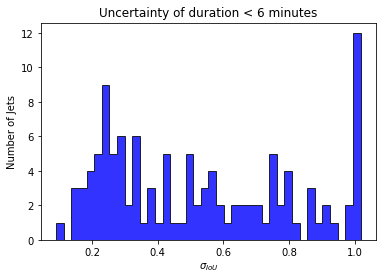

In [71]:
index_short=np.where(stat_dur<6)[0]
index_flag=np.where(flag=='110' or flag=='111')
plt.ylabel('Number of Jets')
plt.title('Uncertainty of duration < 6 minutes')
plt.xlabel('$\sigma_{IoU}$')
plt.hist(stat_sigma[index_short],histtype='stepfilled',color='blue', alpha=0.8, bins=40, ec="k")
plt.savefig('SOL/statistics/stats_statsigma_short.pdf',dpi=300)
plt.show()


In [72]:
y11=(Cluster_date>np.datetime64('2011')) & (Cluster_date<np.datetime64('2012'))
y12=(Cluster_date>np.datetime64('2012')) & (Cluster_date<np.datetime64('2013'))
y13=(Cluster_date>np.datetime64('2013')) & (Cluster_date<np.datetime64('2014'))

/Users/pjol/miniconda3/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:326: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  return super().plot(*args, **kwargs)
/Users/pjol/miniconda3/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:326: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  return super().plot(*args, **kwargs)
/Users/pjol/miniconda3/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:326: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  return super().plot(*args, **kwargs)
/Users/pjol/miniconda3/lib/python3.7/site-packages/matplotlib/image.py:443: UserWarning: Warning: converting a masked elemen

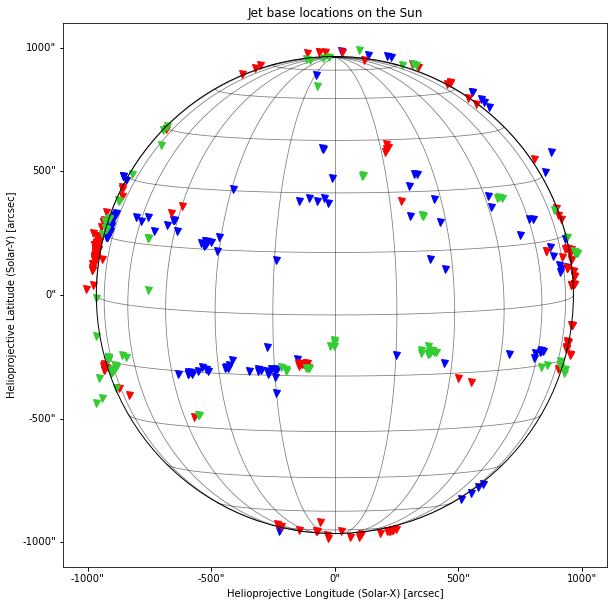

In [73]:
import astropy.units as u
from astropy.coordinates import SkyCoord

import sunpy.map
from sunpy.coordinates import frames

data = np.full((10, 10), np.nan)

# Define a reference coordinate and create a header using sunpy.map.make_fitswcs_header
skycoord = SkyCoord(0*u.arcsec, 0*u.arcsec, obstime='2013-10-28', 
                    observer='earth', frame=frames.Helioprojective)

# Scale set to the following for solar limb to be in the field of view
header = sunpy.map.make_fitswcs_header(data, skycoord, scale=[220, 220]*u.arcsec/u.pixel)

# Use sunpy.map.Map to create the blank map
blank_map = sunpy.map.Map(data, header)

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(projection=blank_map)
blank_map.plot()
blank_map.draw_limb(color="k")
blank_map.draw_grid(color="k")

xc = stat_Bx * u.arcsec
yc = stat_By * u.arcsec

#Plot the coordinates of the base points per year
coords = SkyCoord(xc, yc, frame=blank_map.coordinate_frame)
p = ax.plot_coord(coords[y11], 'o', markersize=7, c='b', marker='v')
p = ax.plot_coord(coords[y12], 'o', markersize=7, c='r', marker='v')
p = ax.plot_coord(coords[y13], 'o', markersize=7, c='limegreen', marker='v')

#Plot the coordinates of all years together
#p_overplot = ax.plot_coord(coords, 'o', markersize=7, c='b', marker='v')

# Set title.
ax.set_title('Jet base locations on the Sun')

plt.savefig('SOL/statistics/Solar_map.pdf',dpi=300)
plt.show()

## Comparison active regions data
Finally we can compare the locations of the jets with active regions measured over the solar cycle. We have used the data from http://solarcyclescience.com/activeregions.html between the years 2009 and 2014.

In [74]:
data=np.loadtxt('200914_AR.txt', dtype='str')

In [77]:
years=data[:,0].astype(int)
months=data[:,1].astype(float)
days=data[:,2].astype(float)
Lat=data[:,-2].astype(float)

In [78]:
import datetime
dates_AR=np.zeros(len(years),dtype='datetime64[D]')
for i in range(len(years)):
    dates_AR[i] = datetime.date(years[i], int(months[i]), int(days[i]))


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later


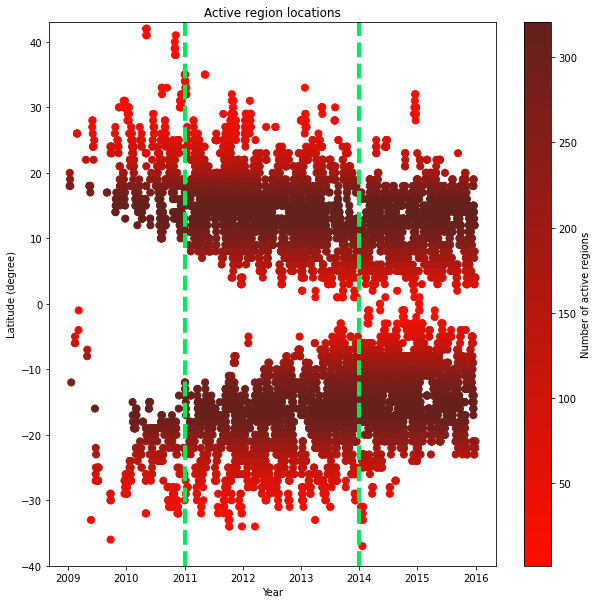

In [79]:
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import gaussian_kde
xy = np.vstack([Lat])
z = gaussian_kde(xy)(xy)*len(Lat)
cmap2 = LinearSegmentedColormap.from_list('', ['#FF0E00', '#63211E'])

fig, ax = plt.subplots(figsize=(10,10))
im = ax.scatter(dates_AR,Lat, c=z, s=50,cmap=cmap2)
#plt.scatter(Cluster_date,stat_Lat, s=30, c='red')
#plt.hist2d(dates_AR, Lat, bins=(50, 50), cmap=plt.cm.jet)
plt.ylabel('Latitude (degree)')
plt.xlabel('Year')
plt.vlines(datetime.date(2011,1,1),-40,43, color='#00EB59',linestyle='dashed',linewidth=4)
plt.vlines(datetime.date(2014,1,1),-40,43, color='#00EB59',linestyle='dashed',linewidth=4)
plt.title('Active region locations')
cbar = plt.colorbar(im)
cbar.set_label('Number of active regions')
plt.savefig('SOL/statistics/AR_location.pdf',dpi=300,bbox='tight_layout')
plt.ylim(-40,43)
plt.show()


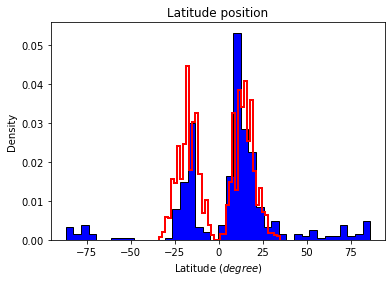

In [80]:
y1113=(dates_AR>np.datetime64('2011')) & (dates_AR<np.datetime64('2014'))
plt.ylabel('Density')
plt.title('Latitude position')
plt.hist(histo[l][index_8],histtype='stepfilled',color='blue', bins=40, ec="k", density=True, label='Active regions')#bins=30,color='red',alpha=0.8)
plt.hist(Lat[y1113],histtype='step',color='red', bins=40, ec="red",density=True, linewidth=2, label='Jet base points')
plt.xlabel(xlabel[l])
plt.savefig(f'SOL/statistics/stats_lat_AR.pdf',dpi=300)
plt.show()